<a href="https://colab.research.google.com/github/VasudevKrishna1990/GenAI/blob/main/Class_2%5CHandWriting_Prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install tensorflow

In [32]:
import tensorflow as tf
from tensorflow.keras import layers , models
import numpy as np
import matplotlib.pyplot as plt


In [33]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [34]:
#plt.imshow(x_train[2],cmap = 'hot')

In [35]:
x_train,x_test = x_train/255.0,x_test/255.0

In [36]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),#first layer / input layer
    layers.Dense(128,activation='relu'), #hidden layer - Dense all neurons are connected to each other
    layers.Dense(10,activation='softmax') # op layer , 10 for 10 no of digits.
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8778 - loss: 0.4345
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9664 - loss: 0.1179
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9752 - loss: 0.0830
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9830 - loss: 0.0564
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9874 - loss: 0.0426
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9907 - loss: 0.0330
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9925 - loss: 0.0257
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9936 - loss: 0.0206
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9952 - loss: 0.0168
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9962 - loss: 0.0132
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9972 - loss: 0.0102
Epoch 12/15
1875/1875 ━━━

In [39]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f'Test Accuracy :{test_acc* 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.1089
Test Accuracy :98.09%


In [40]:
predictions = model.predict(x_test)
print(predictions)
print('Predictions Shape -',predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[9.5173702e-11 8.6992477e-15 2.1748621e-09 ... 9.9999422e-01
  1.0495874e-11 1.7210263e-08]
 [4.3031223e-19 1.5237639e-13 9.9999994e-01 ... 1.2067375e-28
  1.1860364e-13 7.8634310e-27]
 [1.0762284e-11 9.9997813e-01 2.1518968e-06 ... 1.9364588e-06
  1.7497410e-05 7.3949444e-11]
 ...
 [5.0113317e-23 4.1657901e-16 1.9479821e-22 ... 3.0005969e-09
  2.2379263e-11 6.1382757e-09]
 [3.3601906e-23 2.0604747e-19 6.0101526e-21 ... 6.8153918e-19
  5.4104419e-09 4.4750103e-22]
 [3.3759947e-15 3.6283834e-16 1.3702527e-14 ... 1.2030019e-19
  3.6653811e-20 4.3549069e-20]]
Predictions Shape - (10000, 10)


In [41]:
predictions[0]

array([9.5173702e-11, 8.6992477e-15, 2.1748621e-09, 5.7263965e-06,
       3.0106473e-16, 2.2978505e-11, 8.9179983e-20, 9.9999422e-01,
       1.0495874e-11, 1.7210263e-08], dtype=float32)

In [42]:
print(np.argmax(predictions[0]))

7


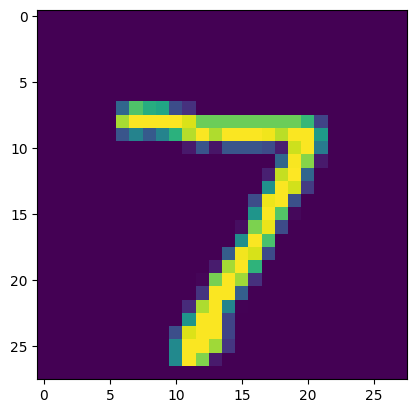

In [43]:
plt.imshow(x_test[0])

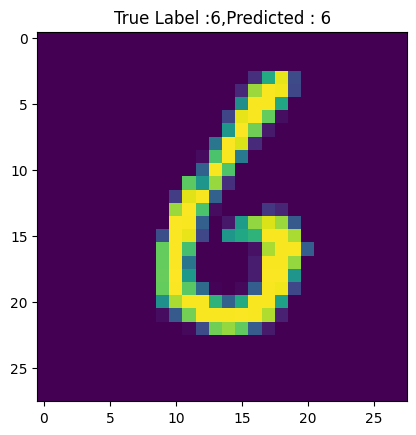

In [44]:
plt.imshow(x_test[50])
plt.title(f"True Label :{y_test[50]},Predicted : {np.argmax(predictions[50])}")
plt.show()

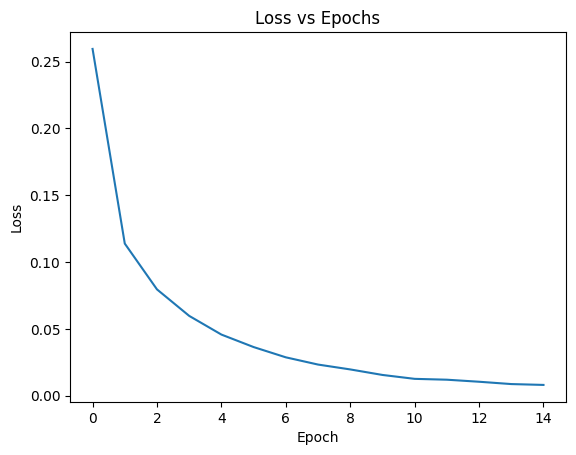

In [45]:
plt.plot(history.history['loss'],label='Training Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()